<a href="https://colab.research.google.com/github/SowjanyaKiran/sowjanya-/blob/main/Credit_Risk_Classification_Dataset_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Random Forest is a powerful and popular algorithm in Data Science used for both classification and regression tasks.**

**Random Forest is an ensemble machine learning algorithm that builds multiple decision trees and merges them together to get a more accurate and stable prediction.**

**Advantages:**

1. High accuracy

2. Works well with both categorical and numerical data

3. Handles missing values

4. Reduces overfitting (compared to a single decision tree)

**Disadvantages:**

1. Slower to predict (many trees involved)

2. Less interpretable than a single decision tree

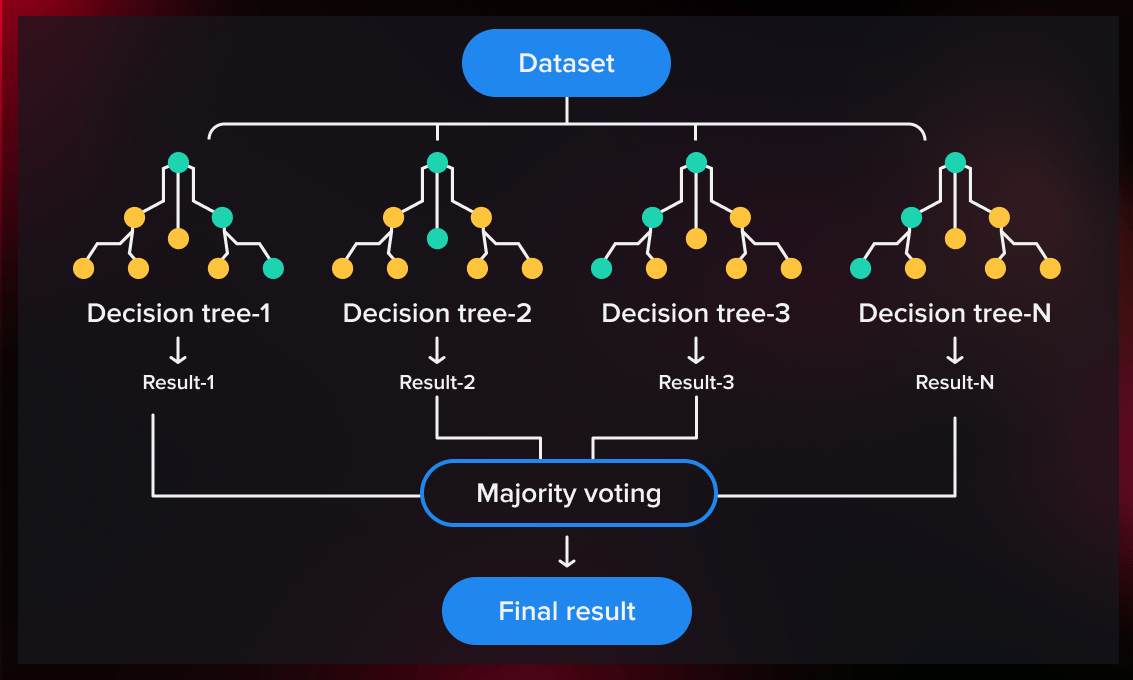

In [6]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Importing the data
data = pd.read_csv("/content/customer_data.csv")
data.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [4]:
#SUMMARIZING THE DATASET
print(data.shape)

(1125, 13)


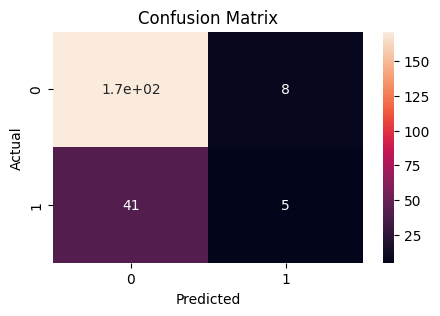

In [17]:
# Confusion Matrix
data = pd.crosstab(y_test, y_pred)
plt.figure(figsize = (5, 3))
sns.heatmap(data, annot = True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [5]:
#PRE-PROCESSING THE DATASET
data.isnull().sum()

,0
label,0
id,0
fea_1,0
fea_2,149
fea_3,0
fea_4,0
fea_5,0
fea_6,0
fea_7,0
fea_8,0


In [10]:
print(data.columns)

Index(['label', 'id', 'fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6',
       'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11'],
      dtype='object')


In [12]:
# Seperating the input and output data
X = data.drop('label', axis = 1)
y = data['label']

In [13]:
# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [22]:
# Creating a Random Forest Classifier
clf = RandomForestClassifier(n_estimators = 100)

# Fitting the data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
# Taking the predictions from the model
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

In [16]:
# Model Evaluation
print('Training Accuracy: ', np.round(metrics.accuracy_score(y_train, y_train_pred), 2))
print('Training Precision: ', np.round(metrics.precision_score(y_train, y_train_pred), 2))
print('Training Recall: ', np.round(metrics.recall_score(y_train, y_train_pred), 2))
print('Training F1 Score: ', np.round(metrics.f1_score(y_train, y_train_pred), 2))

print('\nTesting Accuracy: ', np.round(metrics.accuracy_score(y_test, y_pred), 2))
print('Testing Precision: ', np.round(metrics.precision_score(y_test, y_pred), 2))
print('Testing Recall: ', np.round(metrics.recall_score(y_test, y_pred), 2))
print('Testing F1 Score: ', np.round(metrics.f1_score(y_test, y_pred), 2))

Training Accuracy:  1.0
Training Precision:  1.0
Training Recall:  1.0
Training F1 Score:  1.0

Testing Accuracy:  0.78
Testing Precision:  0.38
Testing Recall:  0.11
Testing F1 Score:  0.17


In [23]:
from sklearn.metrics import accuracy_score

print("Accuracy_Score:",np.round(accuracy_score(y_test, y_pred),2)*100,"%")

Accuracy_Score: 78.0 %


In [25]:
#PREDICTING THE OUTPUT OF SINGLE TEST DATA USING THE TRAINED MODEL
y_test

,label
431,0
366,1
427,0
746,0
732,1
...,...
198,0
810,0
948,0
437,1


In [29]:
X_test.shape

(225, 12)

In [18]:
# Generating the classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.87       179
           1       0.38      0.11      0.17        46

    accuracy                           0.78       225
   macro avg       0.60      0.53      0.52       225
weighted avg       0.72      0.78      0.73       225

